## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [432]:
def remove_ouliers(data,column,remove=False):
    """
        We should pass True to remove only if we are looking in target variable
    """
    q3=data[column].quantile(.75)
    q1=data[column].quantile(.25)
    iqr=q3-q1
    print("(lower,upper,IQR) :",(q1,q3,iqr))
    #iqr=iqr+0.5*iqr
    upper = q3 +1.5*iqr
    lower = q1 - 1.5*iqr
    print("(lower,upper) : ",(lower,upper))
    if remove:
        index_column = data[ data[column] >= upper].index
        data.drop(index_column , inplace=True)
        return data
    data[column]=np.where(data[column]>upper,np.nan,data[column])
    return data

## Data

In [452]:
train_data=pd.read_csv("../data/Train.csv",index_col="Item_Identifier")
test_data=pd.read_csv("../data/Test.csv",index_col="Item_Identifier")
print(train_data.shape)

(8523, 11)


In [454]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [455]:
train_data.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [456]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [457]:
train_data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [458]:
print("shape of train data is ",train_data.shape)
print("shape of test data is ",test_data.shape)

shape of train data is  (8523, 11)
shape of test data is  (5681, 10)


In [459]:
train_data.isnull().sum(axis=0)

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Exploratory Data Analysis

In [460]:
train_data_num=train_data.select_dtypes("float64")
train_data_cat=train_data.select_dtypes("object")
print(train_data_num.head())
print("-----------"*10)
print(train_data_cat.head())

                 Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
Item_Identifier                                                           
FDA15                   9.30         0.016047  249.8092          3735.1380
DRC01                   5.92         0.019278   48.2692           443.4228
FDN15                  17.50         0.016760  141.6180          2097.2700
FDX07                  19.20         0.000000  182.0950           732.3800
NCD19                   8.93         0.000000   53.8614           994.7052
--------------------------------------------------------------------------------------------------------------
                Item_Fat_Content              Item_Type Outlet_Identifier  \
Item_Identifier                                                             
FDA15                    Low Fat                  Dairy            OUT049   
DRC01                    Regular            Soft Drinks            OUT018   
FDN15                    Low Fat                   Meat 

### 1. Outliers

(lower,upper,IQR) : (721.3943, 2552.6772, 1831.2829000000002)
(lower,upper) :  (-2025.5300500000003, 5299.60155)


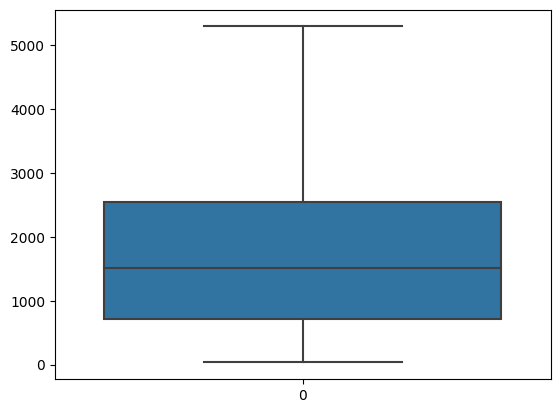

In [476]:
# let'si first check for target variable
sns.boxplot(train_data["Item_Outlet_Sales"])
train_data=remove_ouliers(train_data,"Item_Outlet_Sales",True)

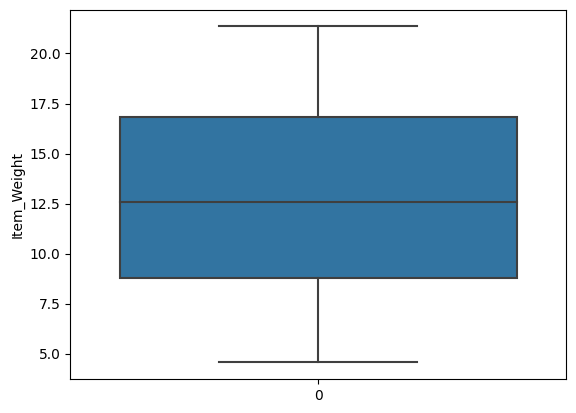

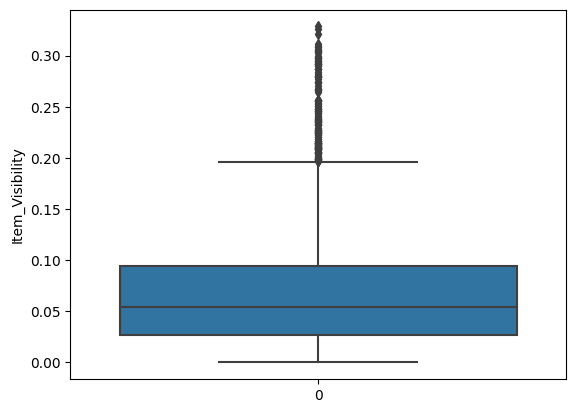

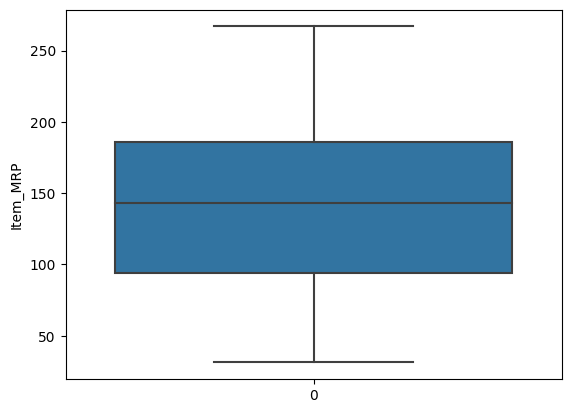

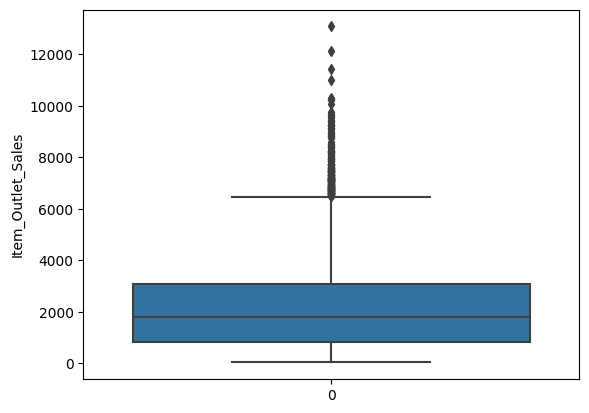

In [463]:
for col in train_data_num:
    sns.boxplot(train_data[col])
    plt.ylabel(str(col))
    plt.show()


In [301]:
q3=train_data_num["Item_Visibility"].quantile(.75)
q1=train_data_num["Item_Visibility"].quantile(.25)
iqr=q3-q1
print("(lower,upper,IQR) :",(q1,q3,iqr))
#iqr=iqr+0.5*iqr
upper = q3 +1.5*iqr
lower = q1 - 1.5*iqr
print("(lower,upper) : ",(lower,upper))

(lower,upper,IQR) : (0.0269894775, 0.0945852925, 0.067595815)
(lower,upper) :  (-0.07440424500000001, 0.195979015)


In [302]:
lower_data=train_data_num["Item_Visibility"]<=lower
upper_data=train_data_num["Item_Visibility"]>=upper

In [303]:
lower_data.isnull().sum(),upper_data.isnull().sum()

(0, 0)

### 2. Removing the outliers


In [304]:
train_data_num["Item_Visibility"]=np.where(train_data_num["Item_Visibility"]>upper,np.nan,train_data_num["Item_Visibility"])

In [305]:
train_data_num.isnull().sum()

Item_Weight          1463
Item_Visibility       144
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

### 3. Missing Values

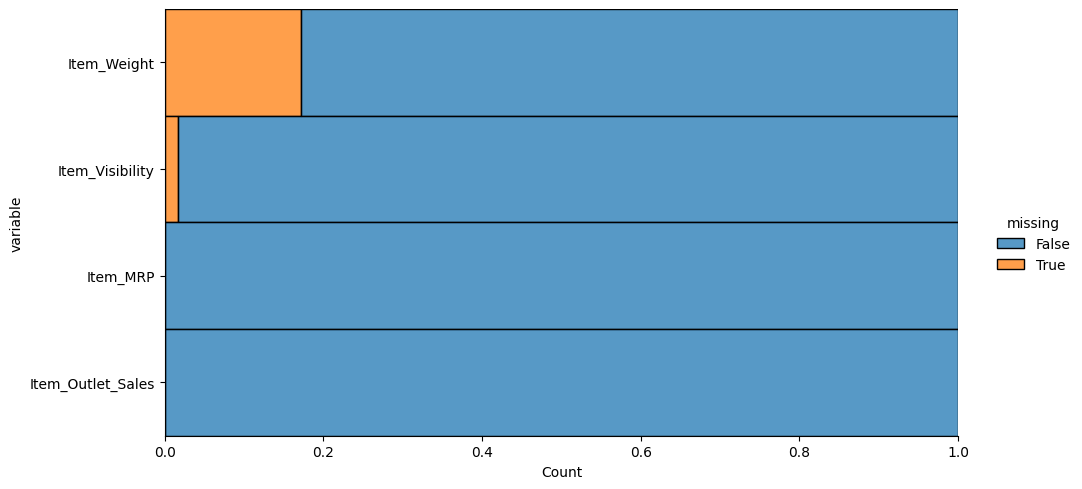

In [306]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

#### Fill Nan Values with median

In [307]:
train_data_num["Item_Visibility"]=train_data_num["Item_Visibility"].fillna(train_data_num["Item_Visibility"].mean())
train_data_num["Item_Weight"]=train_data_num["Item_Weight"].fillna(train_data_num["Item_Weight"].mean())

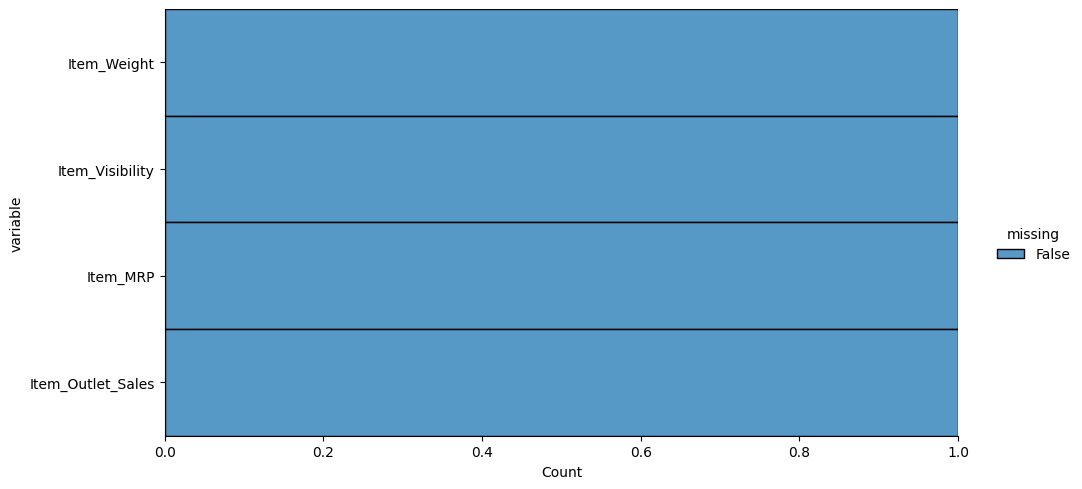

In [308]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

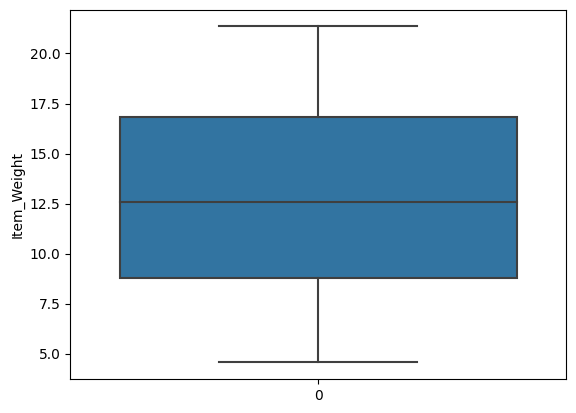

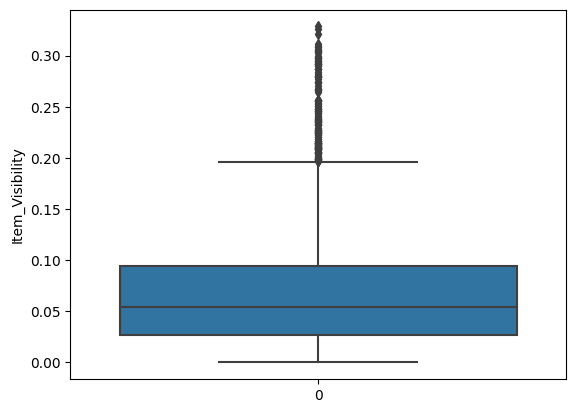

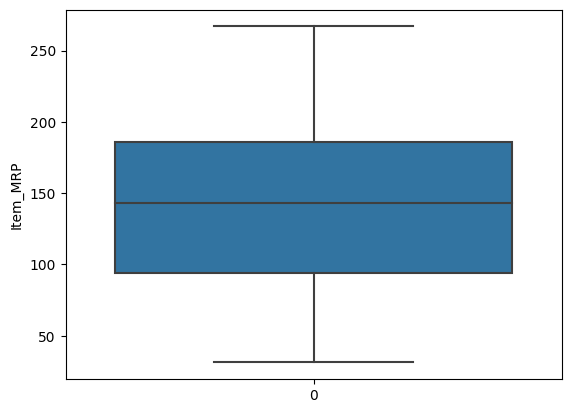

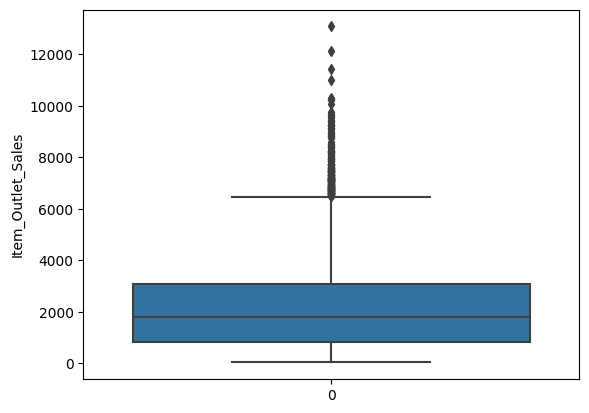

In [309]:
for col in train_data_num:
    sns.boxplot(train_data[col])
    plt.ylabel(str(col))
    plt.show()

In [310]:
train_data_cat["Outlet_Size"]

Item_Identifier
FDA15    Medium
DRC01    Medium
FDN15    Medium
FDX07       NaN
NCD19      High
          ...  
FDF22      High
FDS36       NaN
NCJ29     Small
FDN46    Medium
DRG01     Small
Name: Outlet_Size, Length: 8523, dtype: object

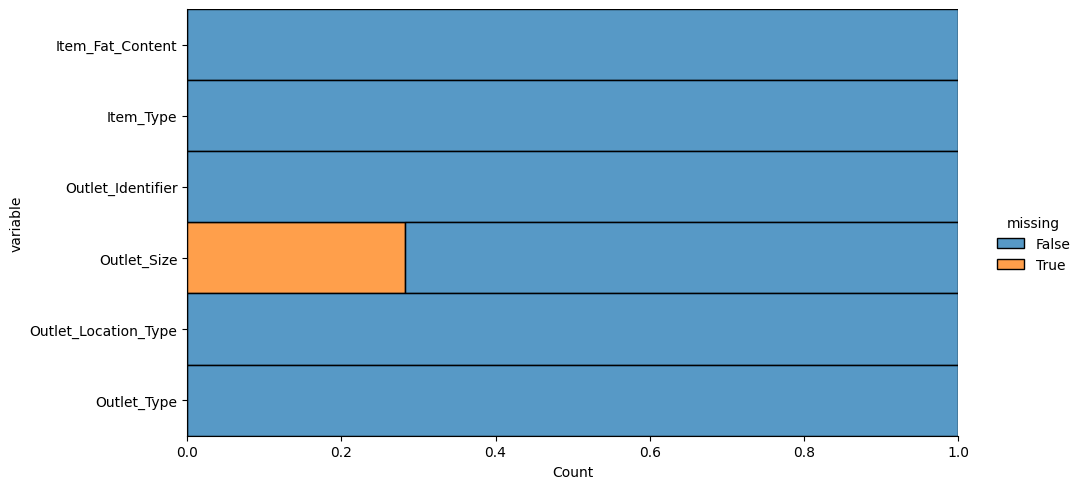

In [311]:
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

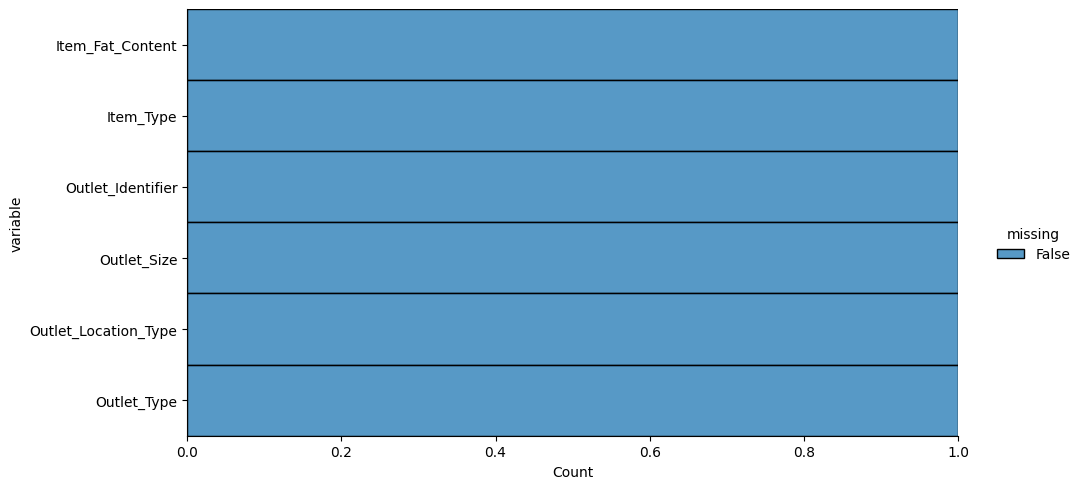

In [312]:
train_data_cat = train_data_cat.fillna(train_data_cat.mode().iloc[0])
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

### Categorical encoding

In [313]:
train_data_cat.shape

(8523, 6)

In [318]:
train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDA15,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
DRC01,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
FDN15,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
FDX07,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
NCD19,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Fusion of data

In [319]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")

In [320]:
data.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDA15,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,9.30,0.016047,249.8092,3735.1380
DRC01,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,5.92,0.019278,48.2692,443.4228
FDN15,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,17.50,0.016760,141.6180,2097.2700
FDX07,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,19.20,0.000000,182.0950,732.3800
NCD19,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,8.93,0.000000,53.8614,994.7052


# Buid Models

In [321]:
from sklearn.model_selection import train_test_split

In [367]:
def evaluate(y_test,y_predict):
    print("MAE ",metrics.mean_absolute_error(y_predict,y_test))
    print("MSE",metrics.mean_squared_error(y_predict,y_test))
    print("RMSE ",np.sqrt(metrics.mean_squared_error(y_predict,y_test)))

In [360]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:data.shape[1]-1], data["Item_Outlet_Sales"], test_size=0.3, random_state=200)

### 1. Linear Regression

In [361]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [362]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.5611143589284722

In [401]:
y_predict=reg.predict(X_test)
evaluate(y_test,y_predict)

MAE  832.2544537493932
MSE 1272135.6769290792
RMSE  1127.88992234574


### 2. regularized linear regression

### RandomForest

In [370]:
from sklearn.ensemble import RandomForestRegressor

In [400]:
random_cl = RandomForestRegressor(n_estimators=100)
random_cl=random_cl.fit(X_train,y_train)
y_predict=random_cl.predict( X_test)
evaluate(y_predict,y_test)

MAE  776.6251466280797
MSE 1241029.3648758407
RMSE  1114.014975157803


### xgboost

In [410]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [409]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

# Fitting the model
xgb_r=xgb_r.fit(X_train, y_train)
 

[17:02:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [406]:
# Predict the model
y_predict = xgb_r.predict(X_test)

In [407]:
evaluate(y_test,y_predict)

MAE  756.5208369110263
MSE 1188570.2901054155
RMSE  1090.2157080621319


In [414]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.001,0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          predictor=None, random_state=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.001, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [419]:
evaluate(y_test,clf.predict(X_test))

MAE  770.8710945231688
MSE 1194210.0800651282
RMSE  1092.7991947586384
